In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_dark"
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shark-tank-india/Shark Tank India.csv


In [14]:
shark_tank = pd.read_csv('../input/shark-tank-india/Shark Tank India.csv')
shark_tank

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,...,Invested Guest Name,All Guest Names,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Ritesh Present,Amit Present,Guest Present
0,1,BluePineFoods,1,1,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Food and Beverage,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
1,1,BoozScooters,1,2,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Vehicles/Electrical Vehicles,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
2,1,HeartUpMySleeves,1,3,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Beauty/Fashion,...,NaN,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
3,1,TagzFoods,2,4,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food and Beverage,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
4,1,HeadAndHeart,2,5,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Children/Education,...,NaN,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,4,Ecoil,51,630,6-Jan-25,18-Mar-25,17-Mar-25,Ecopreneurs In The Tank,Sahiba Bali/Aashish Solanki,Green/CleanTech,...,Chirag Nakrani,Chirag Nakrani,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0
630,4,Rescript,51,631,6-Jan-25,18-Mar-25,17-Mar-25,Ecopreneurs In The Tank,Sahiba Bali/Aashish Solanki,Green/CleanTech,...,NaN,Chirag Nakrani,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0
631,4,TickleYourArt,52,632,6-Jan-25,18-Mar-25,18-Mar-25,Empowering Abilities,Aashish Solanki,Others,...,NaN,"Srikanth Bolla,Chirag Nakrani",1.0,NaN,1.0,1.0,NaN,NaN,NaN,2.0
632,4,Symbionic,52,633,6-Jan-25,18-Mar-25,18-Mar-25,Empowering Abilities,Aashish Solanki,Medical/Health,...,NaN,"Srikanth Bolla,Chirag Nakrani",1.0,NaN,1.0,1.0,NaN,NaN,NaN,2.0


In [15]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              634 non-null    int64  
 1   Startup Name               634 non-null    object 
 2   Episode Number             634 non-null    int64  
 3   Pitch Number               634 non-null    int64  
 4   Season Start               634 non-null    object 
 5   Season End                 634 non-null    object 
 6   Original Air Date          603 non-null    object 
 7   Episode Title              634 non-null    object 
 8   Anchor                     634 non-null    object 
 9   Industry                   634 non-null    object 
 10  Business Description       634 non-null    object 
 11  Company Website            625 non-null    object 
 12  Started in                 577 non-null    float64
 13  Number of Presenters       634 non-null    int64  

In [20]:
shark_tank.describe()

,Season Number,Episode Number,Pitch Number,Started in,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Yearly Revenue,...,Guest Investment Equity,Guest Debt Amount,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Ritesh Present,Amit Present,Guest Present
count,634.000000,634.000000,634.000000,577.000000,634.000000,568.000000,382.000000,3.0,634.000000,343.000000,...,63.000000,6.000000,495.0,428.0,548.0,556.0,388.0,138.0,137.0,311.000000
mean,2.500000,24.055205,317.500000,2019.232236,2.000000,1.593310,0.942408,1.0,0.176656,665.909621,...,4.035135,37.943333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.131833
std,1.106137,15.102549,183.164316,3.060410,0.796913,0.849374,0.624800,0.0,0.381679,1619.021667,...,4.331948,31.921392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.338854
min,1.000000,0.000000,1.000000,1995.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.500000,12.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
25%,2.000000,11.000000,159.250000,2018.000000,1.000000,1.000000,1.000000,1.0,0.000000,90.000000,...,1.365000,17.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
50%,2.000000,24.000000,317.500000,2020.000000,2.000000,1.000000,1.000000,1.0,0.000000,230.000000,...,2.500000,29.750000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
75%,3.000000,36.000000,475.750000,2021.000000,2.000000,2.000000,1.000000,1.0,0.000000,633.000000,...,5.000000,39.870000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
max,4.000000,52.000000,634.000000,2024.000000,6.000000,6.000000,3.000000,1.0,1.000000,18700.000000,...,25.000000,99.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000


In [21]:
shark_tank.columns

Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Episode Title',
       'Anchor', 'Industry', 'Business Description', 'Company Website',
       'Started in', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'EBITDA', 'Cash Burn', 'SKUs', 'Has Patents', 'Bootstrapped',
       'Part of Match off', 'Original Ask Amount', 'Original Offered Equity',
       'Valuation Requested', 'Received Offer', 'Accepted Offer',
       'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt',
       'Debt Interest', 'Deal Valuation', 'Number of Sharks in Deal',
       'Deal Has Conditions', 'Royalty Percentage', 'Royalty Recouped Amount',
       'Advisory Shares Equity', 'Namita Investment Amount',
       'Nam

In [22]:
shark_tank.isnull().sum()

Season Number       0
Startup Name        0
Episode Number      0
Pitch Number        0
Season Start        0
                 ... 
Aman Present       78
Peyush Present    246
Ritesh Present    496
Amit Present      497
Guest Present     323
Length: 80, dtype: int64

Not removing the null values because here the null values are not outliers, it plays a role in the dataset. Like for example, if Namita Debt amount is Nan that means she hasnt given loan to the pitchers and so on.

## Correlation Matrix

In [31]:
shark_tank.select_dtypes(include=np.number).corr(method='pearson').T.round(2).style.background_gradient(cmap='PuBu')


,Season Number,Episode Number,Pitch Number,Started in,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,EBITDA,SKUs,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of Sharks in Deal,Royalty Percentage,Royalty Recouped Amount,Advisory Shares Equity,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ritesh Investment Amount,Ritesh Investment Equity,Ritesh Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Ritesh Present,Amit Present,Guest Present
Season Number,1.000000,0.240000,0.970000,0.280000,-0.080000,-0.150000,-0.400000,nan,-0.020000,0.140000,0.150000,0.050000,-0.120000,0.080000,-0.180000,-0.050000,-0.200000,0.040000,0.000000,0.160000,0.220000,-0.350000,0.200000,-0.110000,0.230000,-0.100000,-0.360000,-0.350000,-0.040000,0.250000,-0.290000,0.220000,0.310000,-0.500000,0.250000,0.320000,-0.210000,-0.020000,0.220000,-0.190000,-0.050000,0.220000,-0.160000,-0.090000,0.350000,-0.000000,0.230000,-0.130000,-0.240000,-0.090000,0.450000,-0.190000,-0.320000,nan,nan,nan,nan,nan,nan,nan,0.190000
Episode Number,0.240000,1.000000,0.430000,0.050000,0.030000,-0.010000,0.020000,nan,0.020000,-0.000000,-0.020000,0.030000,0.040000,-0.150000,0.040000,-0.030000,-0.030000,-0.000000,-0.100000,0.110000,-0.110000,-0.150000,-0.000000,0.150000,-0.010000,0.040000,0.190000,-0.180000,-0.400000,-0.000000,-0.090000,0.050000,-0.120000,-0.300000,-0.140000,-0.120000,-0.200000,-0.130000,-0.030000,-0.150000,-0.380000,-0.170000,-0.060000,0.110000,-0.110000,0.070000,-0.190000,-0.200000,-0.300000,0.760000,-0.260000,-0.120000,-0.480000,nan,nan,nan,nan,nan,nan,nan,0.210000
Pitch Number,0.970000,0.430000,1.000000,0.270000,-0.070000,-0.150000,-0.380000,nan,-0.010000,0.130000,0.140000,0.050000,-0.110000,-0.000000,-0.160000,-0.060000,-0.170000,0.030000,-0.060000,0.140000,0.180000,-0.360000,0.170000,-0.050000,0.210000,-0.080000,-0.220000,-0.370000,-0.210000,0.230000,-0.290000,0.200000,0.260000,-0.540000,0.170000,0.260000,-0.230000,-0.050000,0.190000,-0.210000,-0.160000,0.170000,-0.170000,-0.050000,0.260000,0.040000,0.110000,-0.220000,-0.370000,0.250000,0.370000,-0.210000,-0.380000,nan,nan,nan,nan,nan,nan,nan,0.220000
Started in,0.280000,0.050000,0.270000,1.000000,-0.060000,-0.030000,-0.070000,nan,-0.100000,-0.290000,-0.060000,0.260000,0.250000,0.150000,-0.240000,-0.080000,0.020000,-0.170000,0.030000,0.130000,0.050000,0.010000,-0.420000,0.060000,-0.150000,0.080000,0.120000,-0.400000,0.140000,-0.120000,-0.110000,-0.100000,-0.050000,-0.050000,-0.080000,0.170000,-0.020000,0.550000,0.040000,0.010000,-0.100000,0.000000,-0.040000,0.210000,-0.150000,0.150000,-0.860000,-0.310000,-0.050000,-0.380000,0.150000,-0.160000,0.240000,nan,nan,nan,nan,nan,nan,nan,0.130000
Number of Presenters,-0.080000,0.030000,-0.070000,-0.060000,1.000000,0.720000,0.260000,nan,0.180000,0.050000,-0.020000,-0.160000,-0.020000,0.080000,0.010000,-0.040000,-0.130000,0.070000,0.000000,-0.050000,0.080000,-0.160000,0.160000,0.060000,0.120000,0.080000,-0.160000,0.230000,-0.430000,-0.050000,-0.090000,-0.130000,0.160000,-0.190000,-0.300000,0.110000,-0.260000,-0.040000,0.010000,-0.040000,0.210000,0.010000,-0.240000,0.570000,0.040000,-0.150000,0.460000,-0.190000,-0.110000,0.710000,-0.070000,-0.190000,-0.060000,nan,nan,nan,nan,nan,nan,nan,-0.030000
Male Presenters,-0.150000,-0.010000,-0.150000,-0.030000,0.720000,1.000000,-0.440000,nan,-0.250000,0

## Season 1 - Shark Tank India

In [32]:
print(shark_tank['Season Number'].max(), "season \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")
print(shark_tank['Episode Number'].value_counts().sort_values(ascending=True).unique(), "Pitches came per episodes")

4 season 

52 episodes 

634 startup companies came for pitching 

[ 6  8  9 10 11 12 13 14 31] Pitches came per episodes


## Distribution of Cities from which Pitchers came

Pitchers City
Mumbai          94
Delhi           89
Bangalore       64
Pune            35
Ahmedabad       28
                ..
Belagavi         1
Borbi            1
Delhi,Indore     1
Kolar            1
Ara              1
Name: count, Length: 143, dtype: int64 



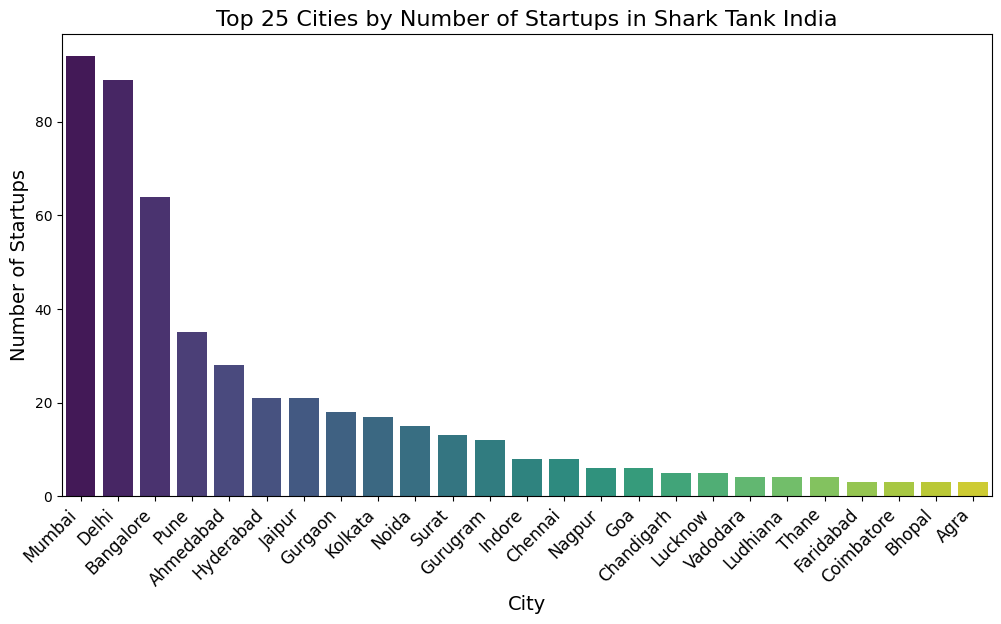

In [39]:
print(shark_tank['Pitchers City'].value_counts(), "\n")
# Get top 25 cities
#because showing all cities is making visibility poor
top_cities = shark_tank['Pitchers City'].value_counts().head(25)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_cities.index, 
    y=top_cities.values, 
    palette='viridis'  
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)


plt.title('Top 25 Cities by Number of Startups in Shark Tank India', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Startups', fontsize=14)

plt.show()


Started in
2019.0    94
2020.0    89
2021.0    81
2018.0    63
2022.0    61
2017.0    52
2023.0    45
2016.0    32
2024.0    16
2015.0    15
2014.0     9
2012.0     7
2013.0     4
2010.0     3
1998.0     1
2005.0     1
2007.0     1
2006.0     1
2011.0     1
1995.0     1
Name: count, dtype: int64 



Text(0.5, 1.0, 'Shark Tank India')

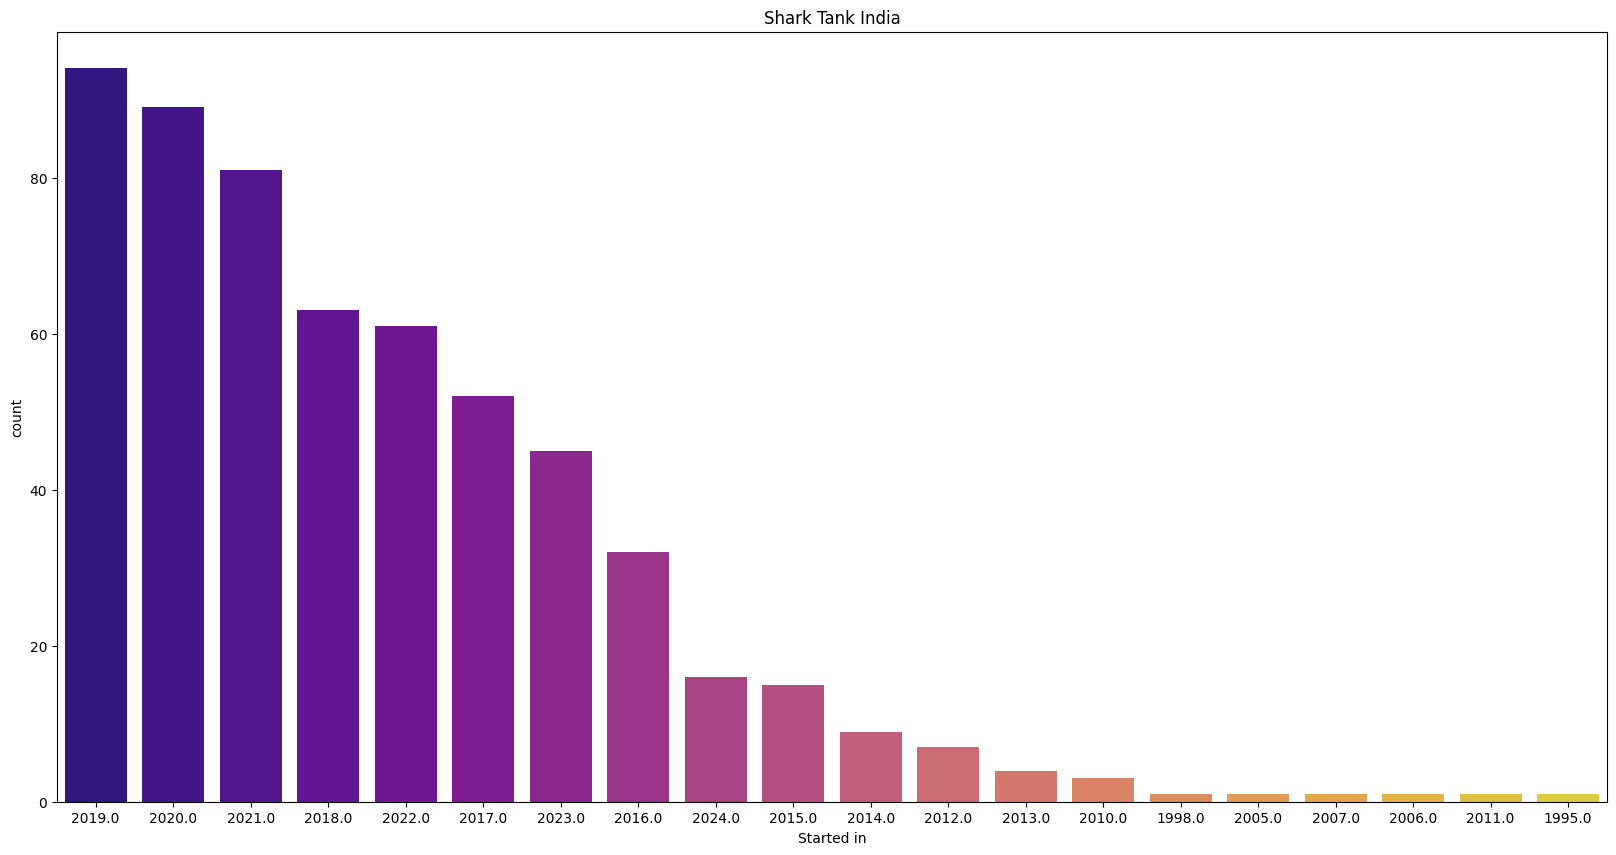

In [44]:
print(shark_tank['Started in'].value_counts(), "\n")
fig = plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Started in', data=shark_tank, order=shark_tank['Started in'].value_counts().index, palette='plasma')
ax.set_title('Shark Tank India')

Pitchers State
Maharashtra        157
Delhi               88
Karnataka           69
Gujarat             54
Haryana             42
Uttar Pradesh       32
Rajasthan           30
Telangana           21
West Bengal         18
Punjab              16
Madhya Pradesh      14
Tamil Nadu          12
Bihar                8
Goa                  6
Jammu & Kashmir      5
Kerala               4
Assam                4
Jharkhand            3
Uttarakhand          3
Name: count, dtype: int64 



Text(0, 0.5, 'Number of Pitchers')

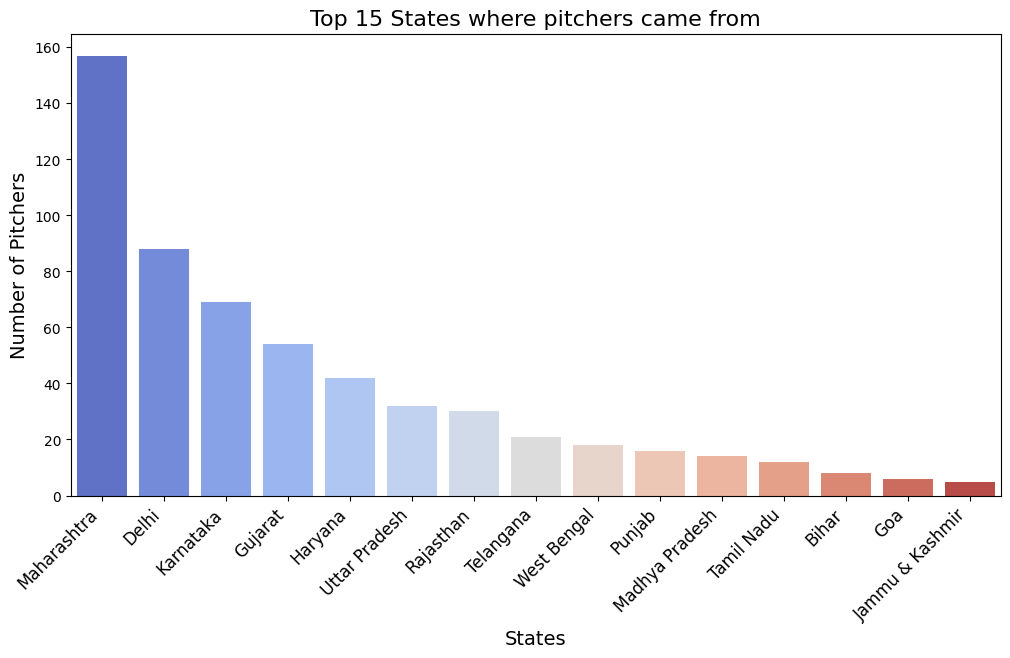

In [53]:
print(shark_tank['Pitchers State'].value_counts().head(19), "\n")

#fig = plt.figure(figsize=(12, 6))
#ax = sns.countplot(x='Pitchers State', data=shark_tank, order=shark_tank['Pitchers State'].value_counts().index)
#ax.set_title('Shark Tank India')


top_states = shark_tank['Pitchers State'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_states.index, 
    y=top_states.values, 
    palette='coolwarm'  
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)


plt.title('Top 15 States where pitchers came from', fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Number of Pitchers', fontsize=14)


## Distribution of different Industries that came for pitching

In [57]:
print(shark_tank['Industry'].value_counts())

Industry
Food and Beverage               142
Beauty/Fashion                  127
Technology/Software              58
Medical/Health                   56
Manufacturing                    52
Lifestyle/Home                   43
Business Services                42
Children/Education               25
Vehicles/Electrical Vehicles     20
Fitness/Sports/Outdoors          19
Green/CleanTech                  15
Agriculture                       7
Liquor/Alcohol                    6
Animal/Pets                       6
Electronics                       5
Others                            5
Entertainment                     4
Hardware                          2
Name: count, dtype: int64


In [59]:
# Count of startups per industry
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=False).reset_index()
tmp.columns = ['Industry', 'Count']

# Plot using Plotly Express
fig = px.bar(
    tmp, 
    x='Industry', 
    y='Count', 
    title="<b>Different Industries in Shark Tank India</b>", 
    color='Industry',   # Bars colored by industry
    template='simple_white',
    text='Count'
)

# Rotating x-axis labels for readability
fig.update_layout(xaxis_tickangle=-45)

fig.show()


## Gender Wise Entrepreneurs 

In [60]:
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total Male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "% (data incomplete)\n", sep='')


Total pitchers - 1268 

Total Male pitchers - 905 

Total female pitchers - 360 

Male entrepreneurs percentage - 71.37%

Female entrepreneurs percentage - 28.39%

Couple entrepreneurs percentage - 8.83% (data incomplete)



## Top 10 Highest Yearly Revenue of the brands

In [63]:
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(
    tmpdf, x="Startup Name",
    y='Yearly Revenue',
    color="Startup Name", 
    title="Highest Revenue of the pitches",
    text=tmpdf['Yearly Revenue'].map(int).map(str) + "%"
)
fig.show()

Startup Name
Refit             18700.0
SavaniHeritage    12400.0
TheBearHouse       9650.0
Fitelo             9100.0
FrenchCrown        7200.0
NasherMiles        5700.0
ImagiMake          5600.0
Rubans             5100.0
YesMadam           5000.0
BaccaBucci         4700.0
Name: Yearly Revenue, dtype: float64


## Top 10 highest Gross Margin of different brands

In [64]:
print(shark_tank.groupby('Startup Name')['Gross Margin'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Gross Margin', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Gross Margin', color="Startup Name", title="Highest Gross margin of the brands", text=tmpdf['Gross Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
Poo-de-Cologne        150.0
Farda                 115.0
Cocofit                95.0
PatchUp                90.0
UnStop                 90.0
AvataarSkincare        87.0
EvaScalp               85.0
MidNightAngelsByPC     83.0
Auli                   80.0
KabaddiAdda            80.0
Name: Gross Margin, dtype: float64


## How many accepted or rejected sharks offers?

Received Offer
1    67%
0    33%
Name: proportion, dtype: object 



<Axes: xlabel='Received Offer', ylabel='count'>

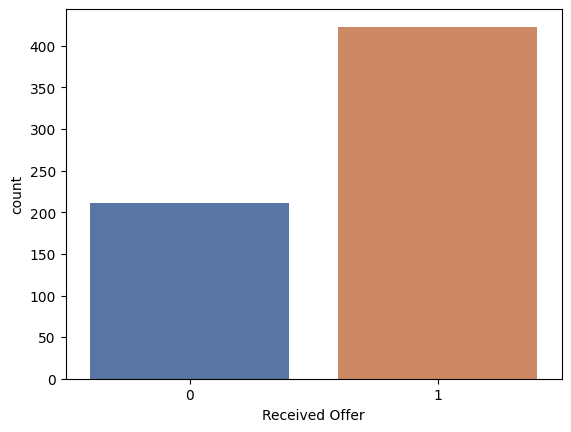

In [65]:
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=shark_tank, palette='deep')

### 67% companies accepted offer while the remaining 33% could not convince the sharks to make an offer

Accepted Offer
1.0    85%
0.0    15%
Name: proportion, dtype: object 



<Axes: xlabel='Accepted Offer', ylabel='count'>

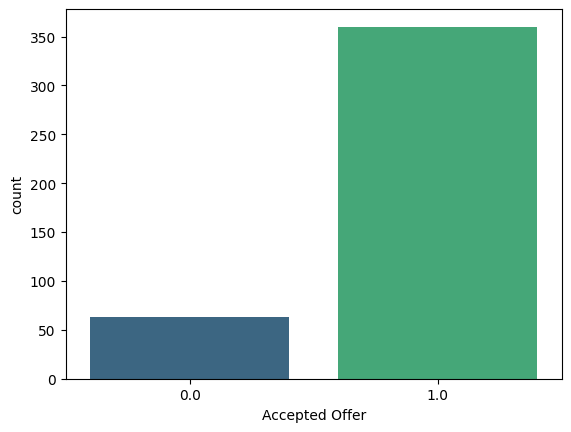

In [66]:
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Accepted Offer', data=shark_tank, palette="viridis")

### 85% companies accepted the offer while the remaining 15% rejected sharks offer

## Startup Companies who rejected sharks offer

In [70]:
shark_tank.loc[shark_tank['Accepted Offer']==0,
["Startup Name","Original Ask Amount","Original Offered Equity","Valuation Requested","Deal Valuation"]].head(10)

,Startup Name,Original Ask Amount,Original Offered Equity,Valuation Requested,Deal Valuation
6,qZenseLabs,100.0,0.25,40000.0,NaN
19,Torch-it,75.0,1.00,7500.0,NaN
21,LaKheerDeli,50.0,7.50,667.0,NaN
27,KabiraHandmad,100.0,5.00,2000.0,NaN
41,MorrikoPureFoods,100.0,3.00,3333.0,NaN
55,IndiaHempandCo,50.0,4.00,1250.0,NaN
60,KetoIndia,150.0,1.25,12000.0,NaN
70,Moonshine,80.0,0.50,16000.0,NaN
71,Falhari,50.0,2.00,2500.0,NaN
73,UrbanMonkey,100.0,1.00,10000.0,NaN


## Industry wise Investments By different sharks

Industry
Beauty/Fashion             25
Medical/Health             22
Food and Beverage          18
Manufacturing               9
Technology/Software         9
Children/Education          7
Business Services           7
Lifestyle/Home              6
Fitness/Sports/Outdoors     5
Agriculture                 2
Green/CleanTech             2
Entertainment               1
Animal/Pets                 1
Name: count, dtype: int64


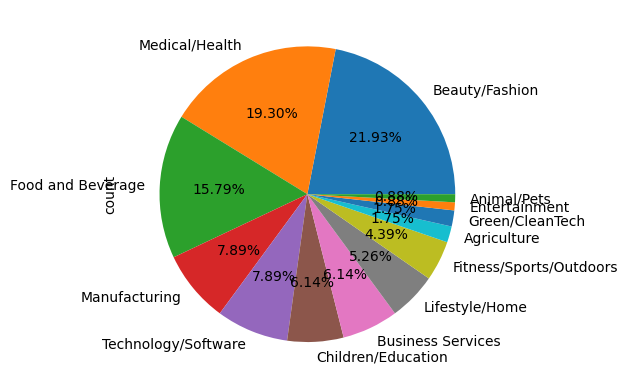

In [72]:
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

### Namita's portfolio has more beauty and Fashion industry based startups than any other sharks.

Industry
Food and Beverage               28
Beauty/Fashion                  21
Lifestyle/Home                   7
Medical/Health                   6
Fitness/Sports/Outdoors          5
Technology/Software              4
Manufacturing                    4
Children/Education               4
Vehicles/Electrical Vehicles     3
Electronics                      2
Business Services                2
Liquor/Alcohol                   2
Green/CleanTech                  1
Name: count, dtype: int64


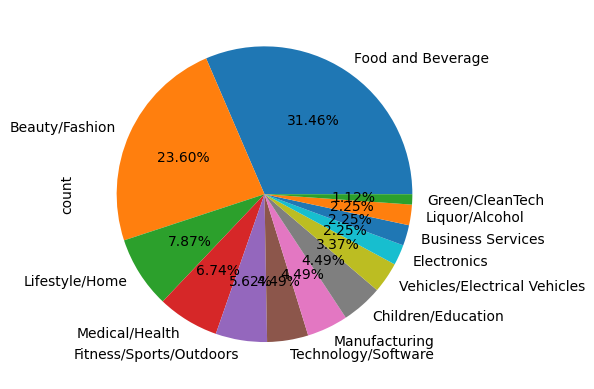

In [73]:
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

### Vineeta's portfolio has 32% food based industry and 23% beauty/Fashion industry. 

Industry
Food and Beverage               17
Medical/Health                  16
Beauty/Fashion                  14
Technology/Software             14
Manufacturing                   12
Business Services                9
Children/Education               4
Lifestyle/Home                   4
Fitness/Sports/Outdoors          4
Agriculture                      3
Green/CleanTech                  2
Animal/Pets                      1
Hardware                         1
Entertainment                    1
Vehicles/Electrical Vehicles     1
Name: count, dtype: int64


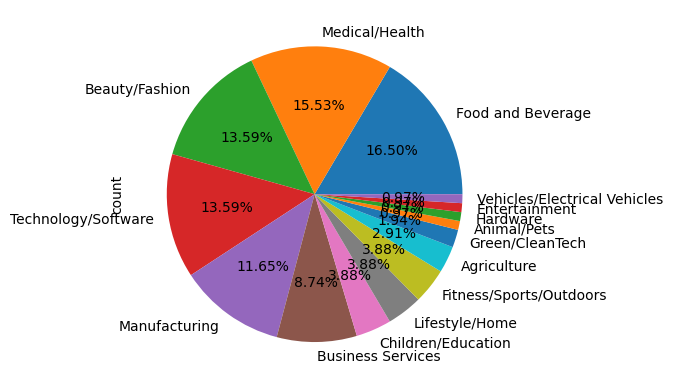

In [74]:
print(shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

### Peyush has most versatile portfolio than any other sharks, showing almost equal contribution in different industries

Industry
Beauty/Fashion                  25
Food and Beverage               24
Medical/Health                  14
Manufacturing                    8
Children/Education               6
Technology/Software              5
Lifestyle/Home                   5
Green/CleanTech                  4
Vehicles/Electrical Vehicles     2
Fitness/Sports/Outdoors          2
Business Services                2
Electronics                      2
Animal/Pets                      1
Others                           1
Name: count, dtype: int64


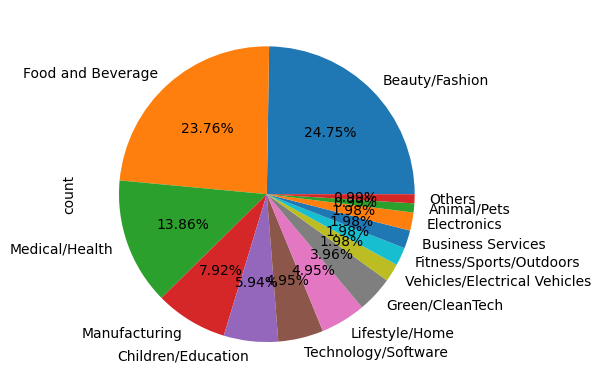

In [76]:
print(shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

### Anupam's portfolio has equally distributed to food and beauty/fashion based startups.

Industry
Beauty/Fashion                  31
Food and Beverage               30
Medical/Health                  18
Technology/Software             15
Manufacturing                   10
Business Services                8
Lifestyle/Home                   6
Children/Education               5
Green/CleanTech                  4
Fitness/Sports/Outdoors          4
Vehicles/Electrical Vehicles     3
Others                           2
Electronics                      1
Animal/Pets                      1
Entertainment                    1
Agriculture                      1
Name: count, dtype: int64


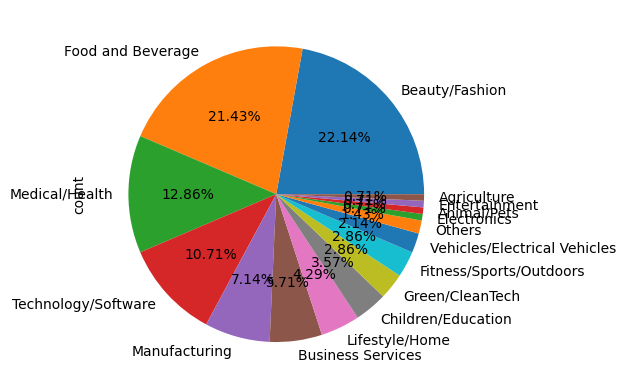

In [77]:
print(shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

### Aman has more food and beauty based startups and the remaining is distributed among different industries

## No. of sharks in a deal

In [81]:
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

Number of Sharks in Deal
1.0    44%
2.0    31%
3.0    13%
4.0     6%
5.0     5%
Name: proportion, dtype: object


In [83]:
#sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
print('The Deals where more than or equals to 5 Sharks are involved')
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])

The Deals where more than or equals to 5 Sharks are involved
           Startup Name  Total Deal Amount  Total Deal Equity
15        SkippiIcePops           100.0000              15.00
50   FindYourKicksIndia            50.0000              25.00
64               INACAN           100.0000              10.00
80   SunfoxTechnologies           100.0000               6.00
209              Snitch           150.0000               1.50
239            Mahantam            30.0000              20.00
274         Pharmallama           200.0000               5.00
311           Sahayatha           100.0000              10.00
357            JewelBox           200.0000               6.00
365         NasherMiles           300.0000               1.50
423           LittleBox            75.0000               2.50
435           Dharaksha             0.0125               1.00
469                PTal           100.0000               3.20
476           Canvaloop           200.0000               4.00
528      

## Total Amount Asked by the Pitchers

In [84]:
print(format_currency(shark_tank['Original Ask Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹816.12 crores


## Total Amount Invested by the sharks

In [85]:
print(format_currency(shark_tank['Total Deal Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹262.85 crores


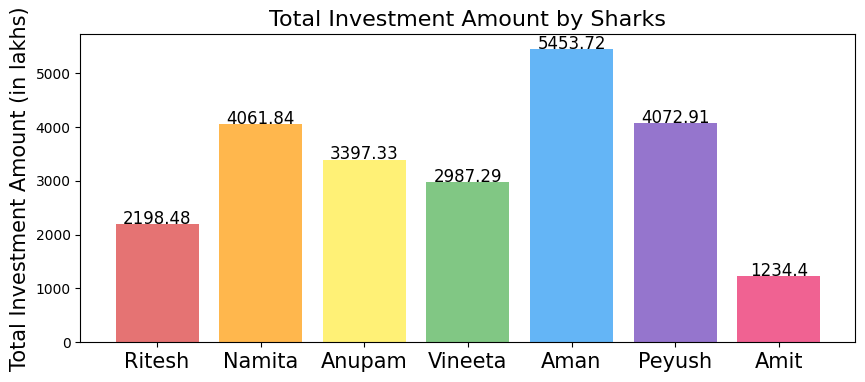

In [89]:
Amount = [
    shark_tank['Ritesh Investment Amount'].sum(),
    shark_tank['Namita Investment Amount'].sum(),
    shark_tank['Anupam Investment Amount'].sum(),
    shark_tank['Vineeta Investment Amount'].sum(),
    shark_tank['Aman Investment Amount'].sum(),
    shark_tank['Peyush Investment Amount'].sum(),
    shark_tank['Amit Investment Amount'].sum()
]

name = ['Ritesh','Namita','Anupam','Vineeta','Aman','Peyush','Amit']
df = {'Name': name, 'Total Amount': Amount}


colors = [
    '#E57373',  # muted red
    '#FFB74D',  # muted orange
    '#FFF176',  # muted yellow
    '#81C784',  # muted green
    '#64B5F6',  # muted blue
    '#9575CD',  # muted purple
    '#F06292'   # muted pink
]

plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color=colors)

plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)", fontsize=15)

for index, d in enumerate(Amount):
    plt.text(x=index, y=d+2, s=f"{round(d,2)}", ha='center', fontsize=12)

plt.title("Total Investment Amount by Sharks", fontsize=16)
plt.show()


## Total Amount Lent by the Sharks

In [90]:
print(format_currency(shark_tank['Total Deal Debt'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹37.46 crores


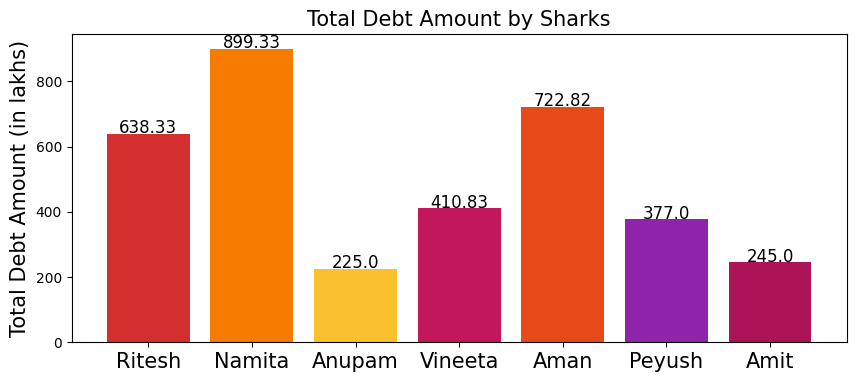

In [93]:
Amount = [shark_tank['Ritesh Debt Amount'].sum(), shark_tank['Namita Debt Amount'].sum(), shark_tank['Anupam Debt Amount'].sum(), shark_tank['Vineeta Debt Amount'].sum(),
    shark_tank['Aman Debt Amount'].sum(), shark_tank['Peyush Debt Amount'].sum(), shark_tank['Amit Debt Amount'].sum()]
name=['Ritesh','Namita','Anupam','Vineeta','Aman','Peyush','Amit']
df = {'Name':name, 'Total Amount':Amount }
colors = [
    '#D32F2F',  # warm red
    '#F57C00',  # warm orange
    '#FBC02D',  # warm yellow
    '#C2185B',  # warm magenta
    '#E64A19',  # warm deep orange
    '#8E24AA',  # warm purple
    '#AD1457'   # warm rose
]
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color=colors)
plt.xticks(fontsize=15)
plt.ylabel("Total Debt Amount (in lakhs)",fontsize=15)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Debt Amount by Sharks", fontsize=15)
plt.show()

## Portfolio's of Different sharks

In [98]:
print("Aman Gupta's total investments", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].reset_index())

Aman Gupta's total investments 40
Investment amount by Aman 54.54 crores

Equity received by Aman 432.31 % in different companies

Debt/loan amount by Aman 7.23 crores

--------------------------------------------------------------------------------
     index    Startup Name                      Industry  \
0        0   BluePineFoods             Food and Beverage   
1        7       Peeschute                Beauty/Fashion   
2       11          Bummer                Beauty/Fashion   
3       12      RevampMoto  Vehicles/Electrical Vehicles   
4       15   SkippiIcePops             Food and Beverage   
..     ...             ...                           ...   
135    597      Beautywise                Beauty/Fashion   
136    610  WhaleWearables                Lifestyle/Home   
137    619        EasyRugs                Lifestyle/Home   
138    628   BhavisyaPlast               Green/CleanTech   
139    631   TickleYourArt                        Others   

     Aman Investment Amount  

In [99]:
print("Namita Thapar's Total Investments", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]])

Namita Thapar's Total Investments 14
Investment amount by Namita 40.62 crores

Equity received by Namita 399.93 % in different companies

Debt/loan amount by Namita 8.99 crores

--------------------------------------------------------------------------------
      Startup Name                 Industry  Namita Investment Amount
10     JhaJiAchaar        Food and Beverage                      28.3
11          Bummer           Beauty/Fashion                      37.5
15   SkippiIcePops        Food and Beverage                      20.0
16    Menstrupedia       Children/Education                      50.0
25           Altor            Manufacturing                      25.0
..             ...                      ...                       ...
598          Ivory           Medical/Health                      50.0
604         Fitelo  Fitness/Sports/Outdoors                      75.0
623   TheBearHouse           Beauty/Fashion                     100.0
628  BhavisyaPlast          Green/CleanTe

In [101]:
print("Vineeta Singh's total investments", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]])

Vineeta Singh's total investments 89
Investment amount by Vineeta 29.87 crores

Equity received by Vineeta 324.52 % in different companies

Debt/loan amount by Vineeta 4.11 crores

--------------------------------------------------------------------------------
         Startup Name                      Industry  Vineeta Investment Amount
0       BluePineFoods             Food and Beverage                       25.0
1        BoozScooters  Vehicles/Electrical Vehicles                       20.0
2    HeartUpMySleeves                Beauty/Fashion                       12.5
8                NOCD             Food and Beverage                       20.0
9               CosIQ                Beauty/Fashion                       25.0
..                ...                           ...                        ...
604            Fitelo       Fitness/Sports/Outdoors                       75.0
606          GoodMonk       Fitness/Sports/Outdoors                       50.0
609         Taffykids      

In [97]:
print("Peyush Bansal's total investments", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].reset_index())

Peyush Bansal's total investments 03
Investment amount by Peyush 40.73 crores

Equity received by Peyush 590.93 % in different companies

Debt/loan amount by Peyush 3.77 crores

--------------------------------------------------------------------------------
     index        Startup Name            Industry  Peyush Investment Amount
0       23  VivalyfInnovations      Medical/Health                    28.000
1       26               Ariro       Manufacturing                    25.000
2       28             Nuutjob      Beauty/Fashion                     8.330
3       29            Meatyour   Food and Beverage                    10.000
4       30           EventBeep  Children/Education                    10.000
..     ...                 ...                 ...                       ...
98     561             Chokhat      Lifestyle/Home                    15.000
99     566          Vibrasense      Medical/Health                    50.000
100    570           HealthFab      Medical/Heal

In [100]:
print("Anupam Mittal's total investments", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]])

Anupam Mittal's total investments 01
Investment amount by Anupam 33.97 crores

Equity received by Anupam 476.67 % in different companies

Debt/loan amount by Anupam 2.25 crores

--------------------------------------------------------------------------------
              Startup Name                      Industry  \
2         HeartUpMySleeves                Beauty/Fashion   
9                    CosIQ                Beauty/Fashion   
12              RevampMoto  Vehicles/Electrical Vehicles   
15           SkippiIcePops             Food and Beverage   
20                  Kavach            Children/Education   
..                     ...                           ...   
579  Nidhi'sGrandmaaSecret                Beauty/Fashion   
582         DorabiAndAmili                Beauty/Fashion   
622               FitFeast             Food and Beverage   
628          BhavisyaPlast               Green/CleanTech   
631          TickleYourArt                        Others   

     Anupam Investme

## Top Investments as per Equity Amount

In [102]:
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(15))
df1 = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:15]
fig = px.bar(df1, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=df1['Total Deal Equity'].map(int).map(str)+'%')
fig.show()

Startup Name
Sid07Designs          75.00
NOOE                  51.00
BoozScooters          50.00
IsakFragrances        50.00
HammerLifestyle       40.00
KGAgrotech            40.00
TheSassBar            35.00
VivalyfInnovations    33.33
GoldSafeSolutions     30.00
HeartUpMySleeves      30.00
JainShikanji          30.00
ColourMeMad-CMM       25.00
CosIQ                 25.00
FindYourKicksIndia    25.00
HoloKitab             25.00
Name: Total Deal Equity, dtype: float64


## Top investments as per Loan Amount

In [103]:
print(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(15))
df1 = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:15]
fig = px.bar(df1, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per loan amount", text=df1['Total Deal Debt'])
fig.show()

Startup Name
SavaniHeritage       200.0
TheBearHouse         200.0
Stage                150.0
Deeva                125.0
WatchoutWearables    100.0
uBreathe             100.0
Otua                  99.0
Nemocare              80.0
Vecros                80.0
Katidhan              75.0
Wol3D                 70.0
TAC                   69.0
maisha                65.0
Hood                  60.0
iMumz                 60.0
Name: Total Deal Debt, dtype: float64


## Total Equity Received By Sharks

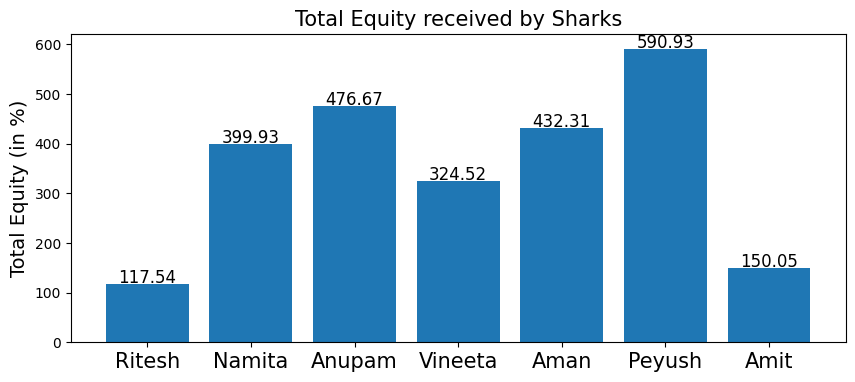

In [105]:
Equity = [shark_tank['Ritesh Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Amit Investment Equity'].sum()]
df = {'Name':name, 'Total Equity':Equity }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (in %)",fontsize=14)
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks", fontsize=15)
plt.show()

## Companies who got the same valuation as they requested

In [108]:
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

,Startup Name,Valuation Requested,Deal Valuation
20,Kavach,50.000000,50.000000
22,BeyondSnack,2000.000000,2000.000000
45,Cocofit,0.000000,0.000000
86,WattTechnovations,0.000000,0.000000
171,TheSimplySalad,300.000000,300.000000
185,Janitri,4000.000000,4000.000000
203,NeoMotion,10000.000000,10000.000000
219,PadCare,2500.000000,2500.000000
223,Geeani,1000.000000,1000.000000
240,MindPeers,5300.000000,5300.000000


## Some companies were on pre-revenue or didn't had any revenue (as of pitching day)

In [109]:
df2 = shark_tank.loc[shark_tank['Yearly Revenue'] == 0]
print(df2['Startup Name'])

9                   CosIQ
23     VivalyfInnovations
24           MotionBreeze
42          GoodGoodPiggy
77             KGAgrotech
83        JulaaAutomation
98               Scholify
100            Sabjikothi
114               On2Cook
131             Scintiglo
205              Sayonara
206                   PMV
257               CureSee
264             HoloKitab
277                  Hood
295             WaggyZone
350                Vecros
415                  Rize
451             Xmachines
455               Prorata
457         AlienVersions
460               Melooha
475          CoolTheGlobe
559              NeuraSim
632             Symbionic
Name: Startup Name, dtype: object


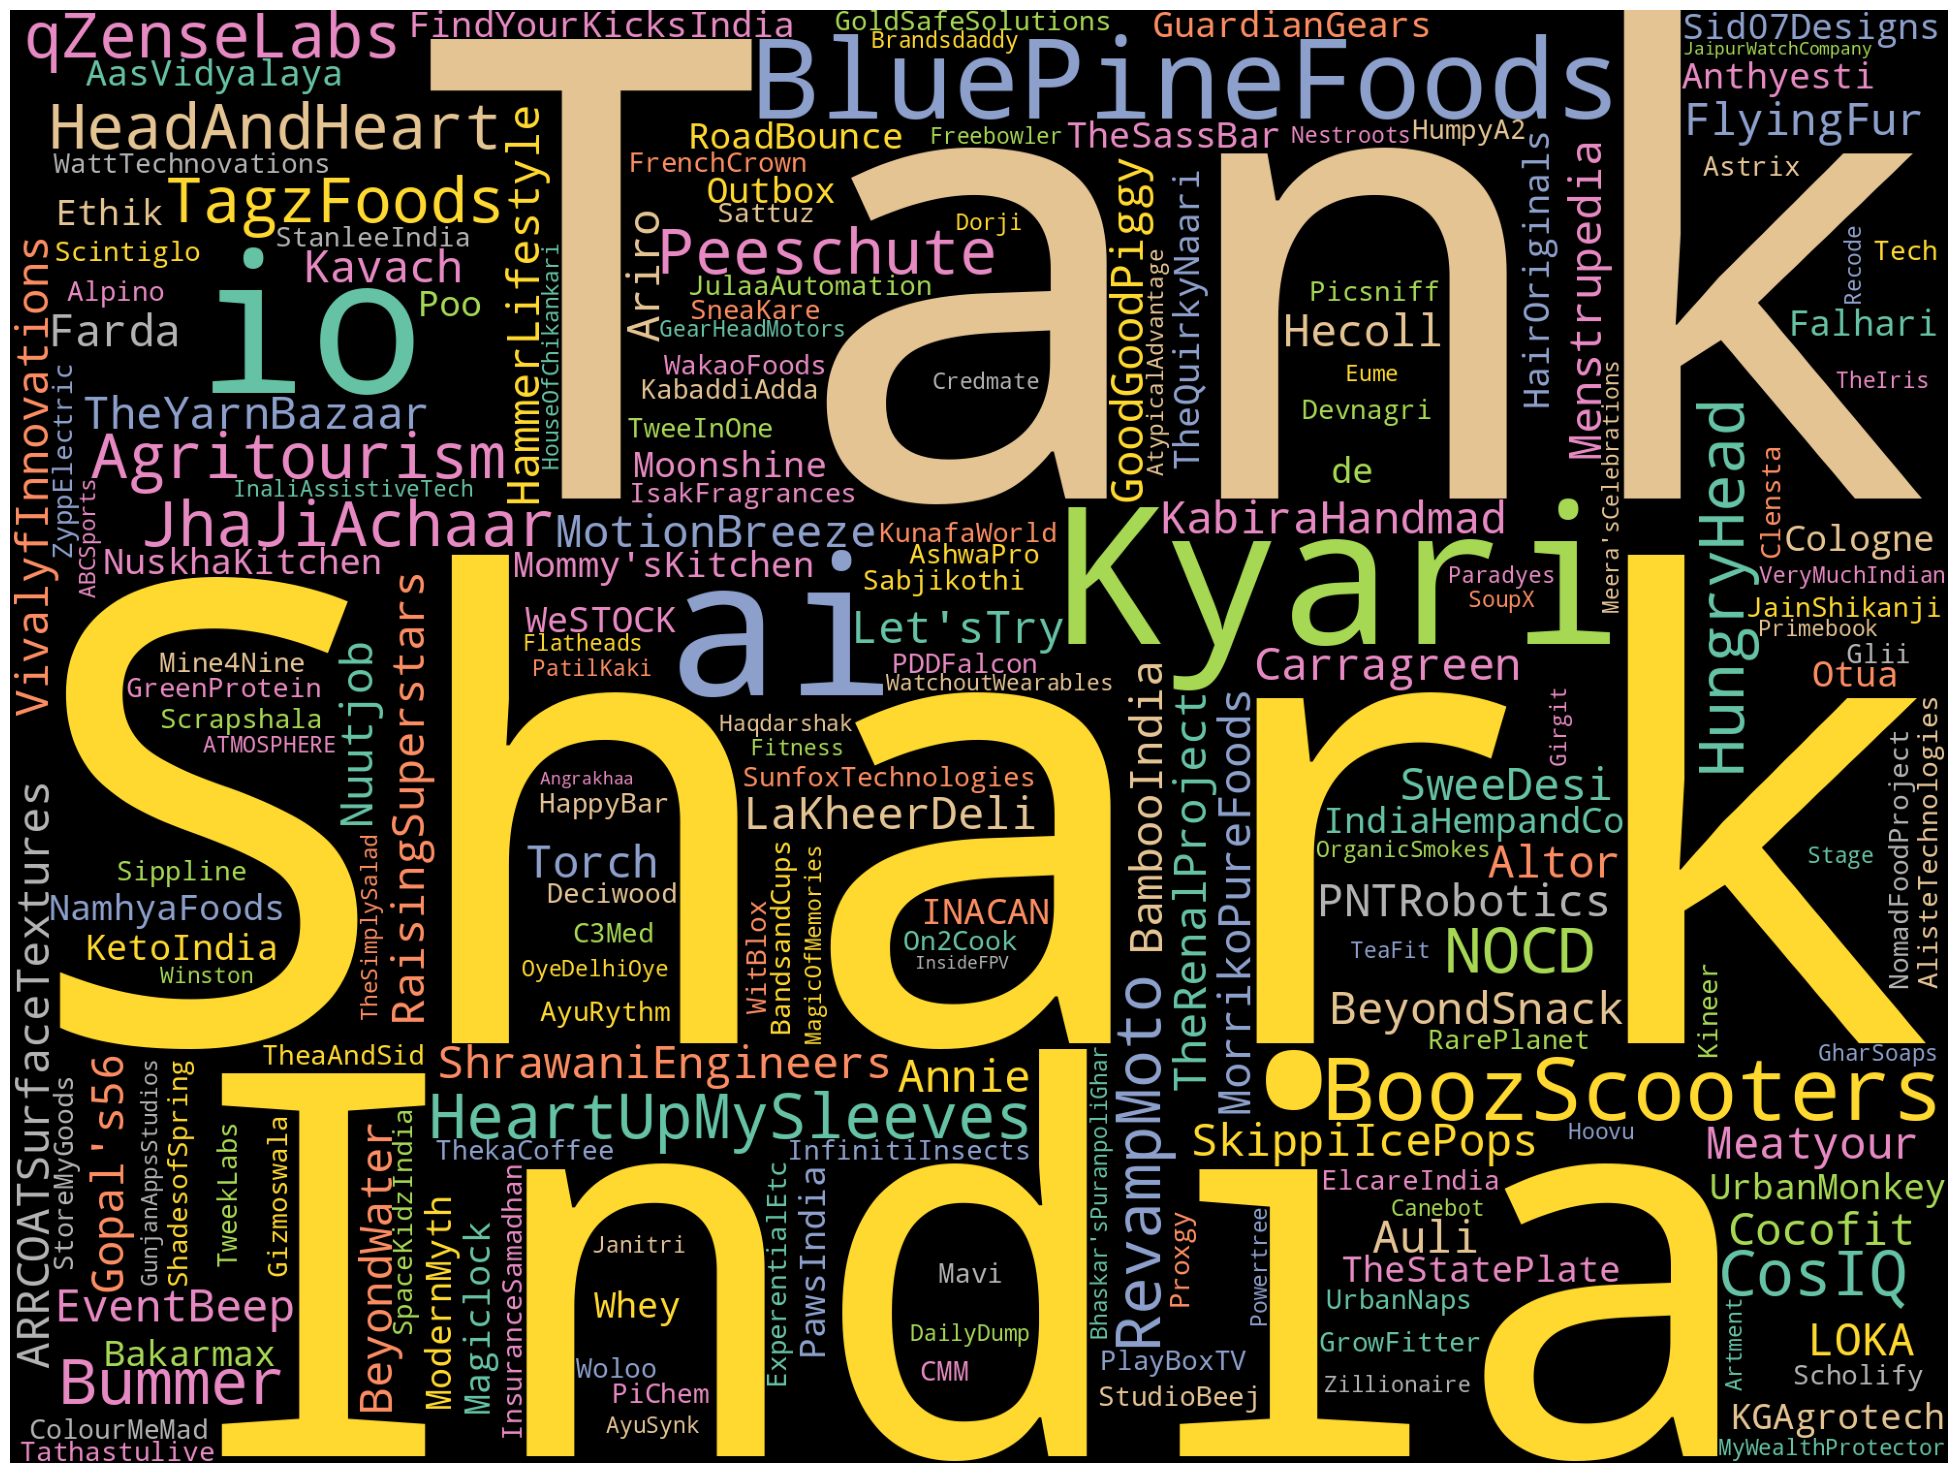

In [110]:
text = " Shark Tank India ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()